In [1]:
import glob
import os
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import json

In [2]:
directory = '../eodata/sentinel5p/no2/'
os.chdir(directory)


In [3]:
from ipynb.fs.full.ltpy_functions import visualize_s5p_pcolormesh, generate_masked_array, generate_geographical_subset


### Create file list of `tiffs`

In [4]:
ndjfma_2019 = xr.open_mfdataset('./nc/2019/s5p*', concat_dim='time')
no2_tropo_2019=ndjfma_2019.NO2_tropo
no2_tropo_2019

ndjfma_2020 = xr.open_mfdataset('./nc/2020/s5p*', concat_dim='time')
no2_tropo_2020=ndjfma_2020.NO2_tropo
no2_tropo_2020


<xarray.DataArray 'NO2_tropo' (time: 169, lat: 5000, lon: 10000)>
dask.array<concatenate, shape=(169, 5000, 10000), dtype=float32, chunksize=(1, 5000, 10000), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 -89.98 -89.95 -89.91 -89.87 ... 89.91 89.95 89.98
  * time     (time) datetime64[ns] 2019-11-01 2019-11-02 ... 2020-04-17
Attributes:
    long_name:  Tropospheric vertical column of nitrogen dioxide (NO2)
    units:      *1e-15 mol/cm-2

In [5]:
conversion_factor=6.02214*1e+19

In [6]:
# Data visualization units.
unit = 'mol/m-2'

# This is this title of the graph that will appear below.
longname = 'Tropospheric vertical column of nitrogen dioxide (NO2)'

In [7]:
eur_extent={'name': 'eur_extent',
    'lonmin':-10.0,
            'lonmax':35,
            'latmin':35.0,
            'latmax':60.0}

# Italy (Po Valley, Milano)
povalley_extent={'name': 'povalley_extent',
    'lonmin':7.0,
            'lonmax':13.0,
            'latmin':44.0,
            'latmax':47.0}

#milano_extent={'name': 'milano_extent',
#    'lonmin':9.0,
##            'lonmax':9.4,
#            'latmin':45.3,
#            'latmax':45.6}


# United Kingdom (Greater London area, London)
#greater_london_extent={'name': 'greater_london_extent',
#    'lonmin':-2.8,
#            'lonmax':1.3,
#            'latmin':50.6,
#            'latmax':52.5}

#london_extent={'name': 'london_extent',
#    'lonmin':-0.6,
#            'lonmax':0.3,
#            'latmin':51.2,
#            'latmax':51.7}



# Germany (Ruhr-Rine area, FFM)
#rhine_ruhr_extent={'name': 'rhine_ruhr_extent',
#    'lonmin':6.1,
#            'lonmax':9.1,
#            'latmin':49.0,
#            'latmax':52.0}

#frankfurt_extent={'name': 'frankfurt_extent',
#    'lonmin':8.5,
#            'lonmax':8.9,
#            'latmin':49.9,
#            'latmax':50.3}


# United States (New York State, New York City)
#ny_extent={'name': 'ny_extent',
#    'lonmin':-79.5,
#            'lonmax':-70.2,
#            'latmin':38.0,
#            'latmax':43.2}

#ny_city_extent={'name': 'ny_city_extent',
#    'lonmin':-74.3,
#            'lonmax':-73.7,
#            'latmin':40.5,
#            'latmax':40.9}


# France (North France, Paris)
#north_france_extent={'name': 'north_france_extent',
#    'lonmin':1.5,
#            'lonmax':3,
#            'latmin':48.0,
#            'latmax':50.0}

#paris_extent={'name': 'paris_extent',
#    'lonmin':2.1,
#            'lonmax':2.5,
#            'latmin':48.7,
#            'latmax':48.9}


# China (Hubei, Wuhan)
hubei_extent={'name': 'hubei_extent',
    'lonmin':108.3,
            'lonmax':116.1,
            'latmin':29.1,
            'latmax':33.3}

#wuhan_extent={'name': 'wuhan_extent',
#    'lonmin':113.7,
#            'lonmax':115.1,
#            'latmin':30.0,
#            'latmax':31.4}


region_list =[eur_extent,
             povalley_extent,
             hubei_extent]

#London / Paris / Hubei / FFM / Milan, New York
#Macro areas Benelux, Ruhr-Rhine, Po Valley, Poland, Wider China, Eastern Coast
#Use the same definitions for GOME2 for Macro areas to compare datasets

In [8]:
def generate_geographical_subset(xarray, latmin, latmax, lonmin, lonmax):
    """ 
    Generates a geographical subset of a xarray DataArray and shifts the longitude grid from a 0-360 to a -180 to 180 deg grid.
    
    Parameters:
        xarray (xarray DataArray): a xarray DataArray with latitude and longitude coordinates
        latmin, latmax, lonmin, lonmax (int): boundaries of the geographical subset
        
    Returns:
        Geographical subset of a xarray DataArray.
    """   
    return xarray.where((xarray.lat < latmax) & (xarray.lat > latmin) & (xarray.lon < lonmax) & (xarray.lon > lonmin),drop=True)

In [9]:
region = region_list[0]
region

{'name': 'eur_extent',
 'lonmin': -10.0,
 'lonmax': 35,
 'latmin': 35.0,
 'latmax': 60.0}

In [10]:
eur_2020 = generate_geographical_subset(no2_tropo_2020,
                                            region['latmin'],
                                            region['latmax'],
                                            region['lonmin'],
                                            region['lonmax'])

In [11]:
test = eur_2020.mean({'lat','lon'})


In [19]:
test_pd = test.to_series()
test_pd

time
2019-11-01         NaN
2019-11-02    0.000023
2019-11-03    0.000027
2019-11-04    0.000027
2019-11-05    0.000028
                ...   
2020-04-13    0.000021
2020-04-14    0.000024
2020-04-15    0.000030
2020-04-16    0.000028
2020-04-17    0.000025
Name: NO2_tropo, Length: 169, dtype: float32

In [27]:
mean_2020

<xarray.DataArray 'NO2_tropo' (time: 169)>
dask.array<mean_agg-aggregate, shape=(169,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 2019-11-02 ... 2020-04-17

In [28]:
region_dict_2019={}
region_dict_2020={}
for region in region_list:
    region_2020 = generate_geographical_subset(no2_tropo_2020,
                                            region['latmin'],
                                            region['latmax'],
                                            region['lonmin'],
                                            region['lonmax'])
    region_2019 = generate_geographical_subset(no2_tropo_2019,
                                            region['latmin'],
                                            region['latmax'],
                                            region['lonmin'],
                                            region['lonmax'])
    
    mean_2020 = region_2020.mean({'lat','lon'}).to_series()
#    sd_2020 = region_2020.std({'lat', 'lon'})
#    median_2020 = region_2020.median({'lat','lon'})
    
    mean_2019 = region_2019.mean({'lat','lon'}).to_series()
#    sd_2019 = region_2019.std({'lat', 'lon'})
#    median_2019 = region_2019.median({'lat','lon'})
    
    region_dict_2020[region['name']] = {'date':mean_2020.index,
                                    'mean':mean_2020.to_list()}
    region_dict_2019[region['name']] = {'date':mean_2019.index,
                                    'mean':mean_2019.to_list()}
    

In [30]:
region_dict_2019

{'eur_extent': {'date': DatetimeIndex(['2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04',
                 '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
                 '2018-11-09', '2018-11-10',
                 ...
                 '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
                 '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
                 '2019-04-29', '2019-04-30'],
                dtype='datetime64[ns]', name='time', length=181, freq=None),
  'mean': [2.9563207135652192e-05,
   3.759422179427929e-05,
   3.274473056080751e-05,
   2.8395934350555763e-05,
   3.321440817671828e-05,
   3.553225542418659e-05,
   4.0523125790059566e-05,
   3.6095640098210424e-05,
   3.375754749868065e-05,
   2.7251655410509557e-05,
   2.765529279713519e-05,
   2.854578815458808e-05,
   3.2245105103356764e-05,
   3.393156293896027e-05,
   3.523835403029807e-05,
   3.884395118802786e-05,
   4.6716977522009984e-05,
   4.068595444550738e-05,
   3.268777800

In [151]:
    
    
tmp_sub_mean = tmp_sub_flag.mean()
        tmp_sub_median = tmp_sub_flag.median()
        tmp_sub_sd = tmp_sub_flag.std()
        
        mean_list.append((tmp_sub_mean.values).item())
        median_list.append((tmp_sub_median.values).item())
        sd_list.append((tmp_sub_sd.values).item())
        

        date = (fileList[i].split('_'))[8]
        date_dt = datetime.strptime(date, '%Y%m%d')
    
        date_list.append(date_dt)
    
    region_dict[region['name']] = {'date':date_list,
                                    'mean':mean_list,
                                      'median':median_list,
                                      'sd':sd_list}

IndexError: list index out of range

### Create daily average NO2 values for different regions

### Loop through the files and store date, mean, sd and median values for each region as dictionary

In [152]:
region_dict={}
for region in region_list:
    print(region)
    date_list=[]
    mean_list=[]
    median_list=[]
    sd_list=[]
    for i in range(len(fileList)):
        print(i)
        tmp = xr.open_rasterio(fileList[i])
        tmp= tmp.rename({'x': 'longitude', 'y':'latitude'})
    
   
        tmp_sub = generate_geographical_subset(tmp,
                                            region['latmin'],
                                            region['latmax'],
                                            region['lonmin'],
                                            region['lonmax'])

        tmp_sub_flag = tmp_sub.where(tmp_sub>0,np.nan)
        
        
        tmp_sub_mean = tmp_sub_flag.mean()
        tmp_sub_median = tmp_sub_flag.median()
        tmp_sub_sd = tmp_sub_flag.std()
        
        mean_list.append((tmp_sub_mean.values).item())
        median_list.append((tmp_sub_median.values).item())
        sd_list.append((tmp_sub_sd.values).item())
        

        date = (fileList[i].split('_'))[8]
        date_dt = datetime.strptime(date, '%Y%m%d')
    
        date_list.append(date_dt)
    
    region_dict[region['name']] = {'date':date_list,
                                    'mean':mean_list,
                                      'median':median_list,
                                      'sd':sd_list}
    


{'name': 'eur_extent', 'lonmin': -10.0, 'lonmax': 35, 'latmin': 35.0, 'latmax': 60.0}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


### Function to help read and load .json files

In [153]:
def myconverter(o):
    if isinstance(o, datetime):
        return o.__str__()

### Save time series dictionary as JSON

In [154]:
with open('../../../shared/s5p_ts_regions_till_apr.json', 'w') as f:
        json.dump(region_dict, f, default=myconverter)

### Open json file

In [156]:
with open("../../../shared/s5p_ts_regions_till_apr.json",encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)
#(data['eur_extent']['mean'])*conversion_factor

In [31]:
def df_subset(df,low_bound1, high_bound1, low_bound2, high_bound2):
    return df[(df.index>low_bound1) & (df.index<high_bound1)], df[(df.index>low_bound2) & (df.index<high_bound2)]


In [32]:
region_dict_2020

{'eur_extent': {'date': DatetimeIndex(['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
                 '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
                 '2019-11-09', '2019-11-10',
                 ...
                 '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
                 '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
                 '2020-04-16', '2020-04-17'],
                dtype='datetime64[ns]', name='time', length=169, freq=None),
  'mean': [nan,
   2.3380862330668606e-05,
   2.6942758267978206e-05,
   2.7243799195275642e-05,
   2.7659534680424258e-05,
   2.828551259881351e-05,
   3.108060991507955e-05,
   3.00010997307254e-05,
   2.7907331968890503e-05,
   3.502882827888243e-05,
   2.8257649319129996e-05,
   3.466800262685865e-05,
   2.9852842999389395e-05,
   3.133499194518663e-05,
   2.502427014405839e-05,
   3.073705011047423e-05,
   3.381968053872697e-05,
   2.7239655537414365e-05,
   3.838858174276538e-05,
   4.3

In [39]:
no2_1920_dict={}
df_eur_20 = pd.DataFrame(region_dict_2020['eur_extent'])
df_eur_19 = pd.DataFrame(region_dict_2019['eur_extent'])
df_eur = df_eur_19.append(df_eur_20)
df_eur['7day_mean'] = df_eur.iloc[:,1].rolling(window=7, min_periods=3, center=False).mean()
df_eur['15day_mean'] = df_eur.iloc[:,1].rolling(window=15, min_periods=3, center=False).mean()
df_eur = df_eur.set_index('date')

df_eur_2019, df_eur_2020 = df_subset(df_eur, '2018-11-30', '2019-04-15', '2019-11-30', '2020-04-15')


df_eur_2019.index = pd.DatetimeIndex(df_eur_2019.index).strftime('%m-%d')
df_eur_2020.index = pd.DatetimeIndex(df_eur_2020.index).strftime('%m-%d')
 
tmp_df_merged = df_eur_2019.merge(df_eur_2020, how='left', left_index=True, right_index=True)

no2_1920_dict[region['name']] = {
        'mean': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['mean_x'].to_list(),
            '2020': tmp_df_merged['mean_y'].to_list()},
        '7day_mean': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['7day_mean_x'].to_list(),
            '2020': tmp_df_merged['7day_mean_y'].to_list()},
        '15day_mean': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['15day_mean_x'].to_list(),
            '2020': tmp_df_merged['15day_mean_y'].to_list()}
    }                      

{'name': 'hubei_extent', 'lonmin': 108.3, 'lonmax': 116.1, 'latmin': 29.1, 'latmax': 33.3}


In [40]:
no2_1920_dict

{'hubei_extent': {'mean': {'date': Index(['12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07', '12-08',
          '12-09', '12-10',
          ...
          '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12',
          '04-13', '04-14'],
         dtype='object', length=135),
   '2019': [3.061521056224592e-05,
    2.4606173610663973e-05,
    2.677424890862312e-05,
    3.8031994336051866e-05,
    3.9646882214583457e-05,
    3.489313166937791e-05,
    2.840498746081721e-05,
    3.078784357057884e-05,
    2.7444257284514606e-05,
    2.7608430173131637e-05,
    4.032616925542243e-05,
    4.336291749496013e-05,
    4.4581276597455144e-05,
    3.967533848481253e-05,
    3.581870623747818e-05,
    2.9219756470411085e-05,
    3.119697794318199e-05,
    3.557704985723831e-05,
    3.183291119057685e-05,
    2.894163662858773e-05,
    3.012024717463646e-05,
    2.7723901439458132e-05,
    2.6313713533454575e-05,
    2.6934540073852986e-05,
    2.053286698355805e-05,
  

In [164]:
no2_1920_dict = {}
for region in region_list:
    print(region)
    tmp_df = pd.DataFrame(data[region['name']])
    tmp_df = tmp_df.sort_values(by='date')
    tmp_df = tmp_df.drop([44])

    tmp_df['7day_mean'] = tmp_df.iloc[:,1].rolling(window=7, min_periods=3, center=False).mean()
    tmp_df['15day_mean'] = tmp_df.iloc[:,1].rolling(window=15, min_periods=3, center=False).mean()
#    tmp_df['7day_median'] = tmp_df.iloc[:,2].rolling(window=7, min_periods=3, center=False).mean()
#    tmp_df['15day_median'] = tmp_df.iloc[:,2].rolling(window=15, min_periods=3, center=False).mean()
    
    tmp_df = tmp_df.set_index('date')

    tmp_df_2019, tmp_df_2020 = df_subset(tmp_df, '2018-11-30', '2019-04-15', '2019-11-30', '2020-04-15')


    tmp_df_2019.index = pd.DatetimeIndex(tmp_df_2019.index).strftime('%m-%d')
    tmp_df_2020.index = pd.DatetimeIndex(tmp_df_2020.index).strftime('%m-%d')
 
    tmp_df_merged = tmp_df_2019.merge(tmp_df_2020, how='left', left_index=True, right_index=True)
    print(region)
    no2_1920_dict[region['name']] = {
        'mean': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['mean_x'].to_list(),
            '2020': tmp_df_merged['mean_y'].to_list()},
        'sd': {
            'date': tmp_df_merged.index.to_list(),
            '2019': tmp_df_merged['sd_x'].to_list(),
            '2020': tmp_df_merged['sd_y'].to_list()},
        'median': {
            'date': tmp_df_merged.index.to_list(),
            '2019': tmp_df_merged['median_x'].to_list(),
            '2020': tmp_df_merged['median_y'].to_list()},
        '7day_mean': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['7day_mean_x'].to_list(),
            '2020': tmp_df_merged['7day_mean_y'].to_list()},
        '15day_mean': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['15day_mean_x'].to_list(),
            '2020': tmp_df_merged['15day_mean_y'].to_list()},
        '7day_median': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['7day_median_x'].to_list(),
            '2020': tmp_df_merged['7day_median_y'].to_list()},
        '15day_median': {
            'date': tmp_df_merged.index,
            '2019': tmp_df_merged['15day_median_x'].to_list(),
            '2020': tmp_df_merged['15day_median_y'].to_list()}
    }                      

{'name': 'eur_extent', 'lonmin': -10.0, 'lonmax': 35, 'latmin': 35.0, 'latmax': 60.0}
{'name': 'eur_extent', 'lonmin': -10.0, 'lonmax': 35, 'latmin': 35.0, 'latmax': 60.0}
{'name': 'povalley_extent', 'lonmin': 7.0, 'lonmax': 13.0, 'latmin': 44.0, 'latmax': 47.0}
{'name': 'povalley_extent', 'lonmin': 7.0, 'lonmax': 13.0, 'latmin': 44.0, 'latmax': 47.0}
{'name': 'hubei_extent', 'lonmin': 108.3, 'lonmax': 116.1, 'latmin': 29.1, 'latmax': 33.3}
{'name': 'hubei_extent', 'lonmin': 108.3, 'lonmax': 116.1, 'latmin': 29.1, 'latmax': 33.3}


In [165]:
no2_1920_dict['eur_extent']

{'mean': {'date': Index(['12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07', '12-08',
         '12-09', '12-10',
         ...
         '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12',
         '04-13', '04-14'],
        dtype='object', length=135),
  '2019': [3.0653769499622285e-05,
   2.4602424673503265e-05,
   2.674362258403562e-05,
   3.8045342080295086e-05,
   3.971152182202786e-05,
   3.4906883229268715e-05,
   2.8392902095220052e-05,
   3.083633419009857e-05,
   2.7448602850199677e-05,
   2.7643076464300975e-05,
   4.03602680307813e-05,
   4.336343772592954e-05,
   4.46255253336858e-05,
   3.969226236222312e-05,
   3.58092765964102e-05,
   2.9290973543538712e-05,
   3.121144254691899e-05,
   3.563203426892869e-05,
   3.1917792512103915e-05,
   2.898001366702374e-05,
   3.013747300428804e-05,
   2.7774847694672644e-05,
   2.636730278027244e-05,
   2.6952739062835462e-05,
   2.05712640308775e-05,
   2.1890513380640186e-05,
   2.5737061150721274e-05

In [166]:
with open('../../../shared/s5p_ts_2019_2020_till_apr.json', 'w') as f:
        json.dump(no2_1920_dict, f, default=myconverter)

### Plotting

In [167]:
djfm_mean = pd.DataFrame(no2_1920_dict['povalley_extent']['mean'])
djfm_mean = djfm_mean.set_index('date')
djfm_mean[100:135]

,2019,2020
date,,
03-11,0.000053,0.000061
03-12,0.000054,0.000038
03-13,0.000061,0.000030
03-14,0.000067,0.000015
03-15,0.000076,0.000029
03-16,0.000061,0.000042
03-17,0.000027,0.000045
03-18,0.000039,0.000041
03-19,0.000043,0.000036


In [168]:
djfm_mean = pd.DataFrame(no2_1920_dict['eur_extent']['mean'])
test1=pd.DataFrame()
test1['7day_ma'] = djfm_mean.iloc[:,1].rolling(window=7, min_periods=1).mean()
test1['15day_ma'] = djfm_mean.iloc[:,1].rolling(window=15, min_periods=1).mean()
test1

,7day_ma,15day_ma
0,0.000031,0.000031
1,0.000028,0.000028
2,0.000027,0.000027
3,0.000030,0.000030
4,0.000032,0.000032
...,...,...
130,0.000025,0.000026
131,0.000026,0.000026
132,0.000026,0.000026
133,0.000026,0.000026


#### Daily averages raw plot

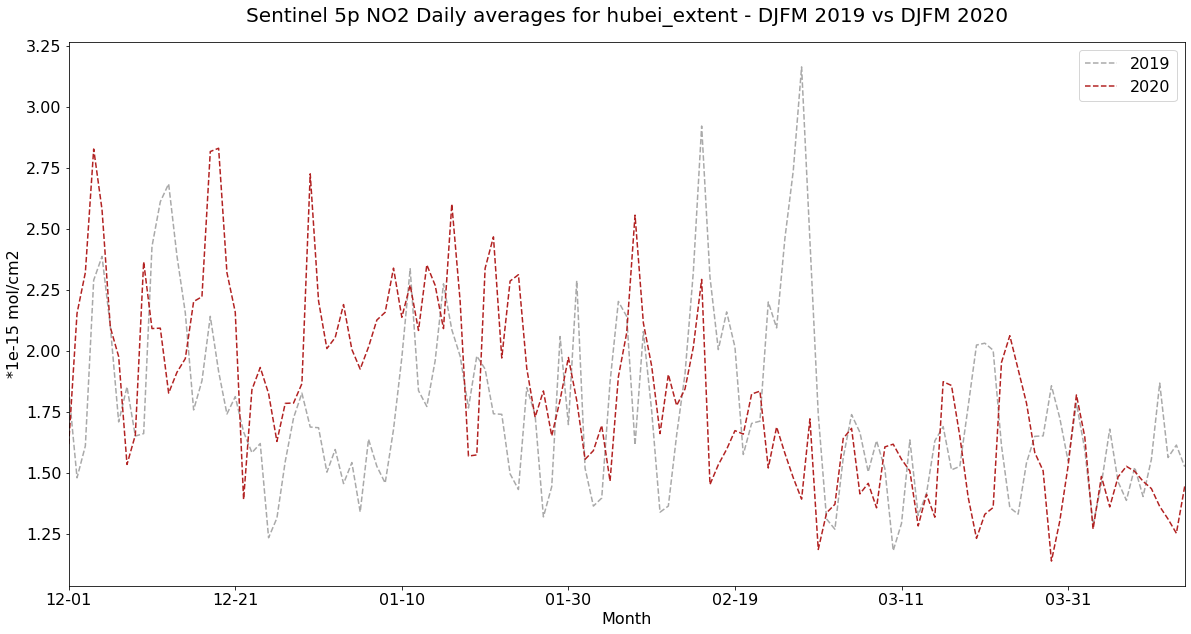

In [42]:
import matplotlib.patches as patches
for region in no2_1920_dict.keys():
    djfm_mean = pd.DataFrame(no2_1920_dict['hubei_extent']['mean'])
    djfm_mean = djfm_mean.set_index('date')

    ax=(djfm_mean*conversion_factor*1e-15).plot.line(figsize=(20,10), linestyle='dashed',color=['darkgrey','firebrick'],label=['DJFM 2019','DJFM 2020'])
#    rect = patches.Rectangle((djfm_mean.index.get_loc('02-26'),0),34,120,linewidth=1, fill=True,facecolor='slateblue', alpha=0.1,)

#    ax.add_patch(rect)
#    ax.axvline(djfm_mean.index.get_loc('02-26'), color='slateblue', linestyle='--', lw=2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Sentinel 5p NO2 Daily averages for " + region +  " - DJFM 2019 vs DJFM 2020", fontsize=20, pad=20)
    plt.ylabel('*1e-15 mol/cm2', fontsize=16)
    plt.xlabel('Month', fontsize=16)
    plt.legend(fontsize=16,loc=1)
    plt.show()

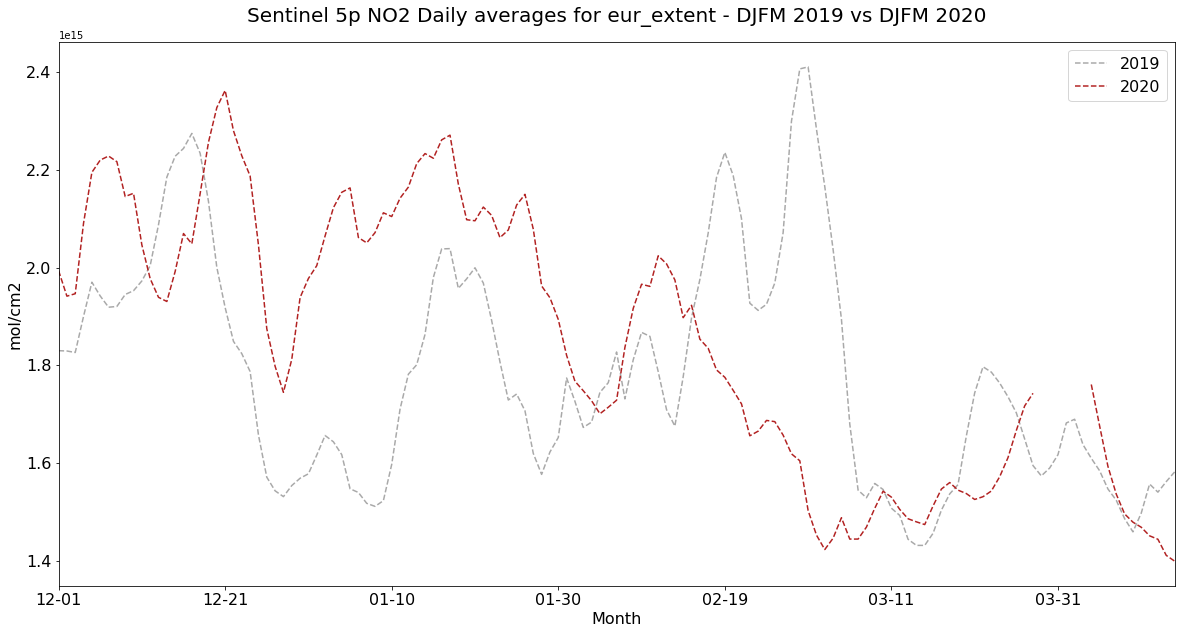

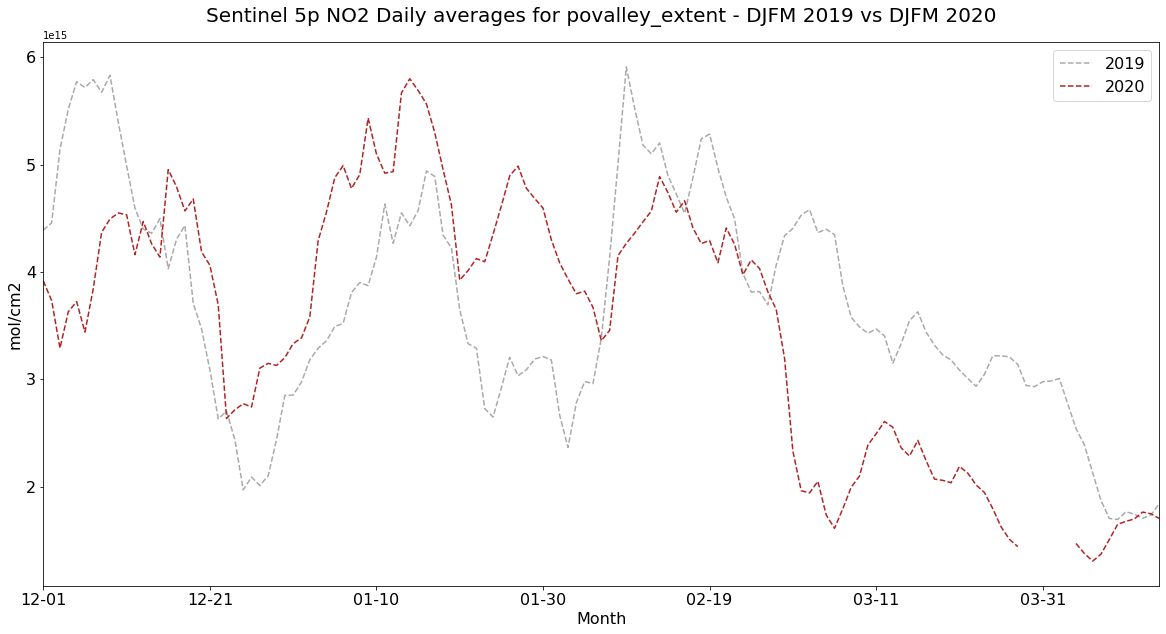

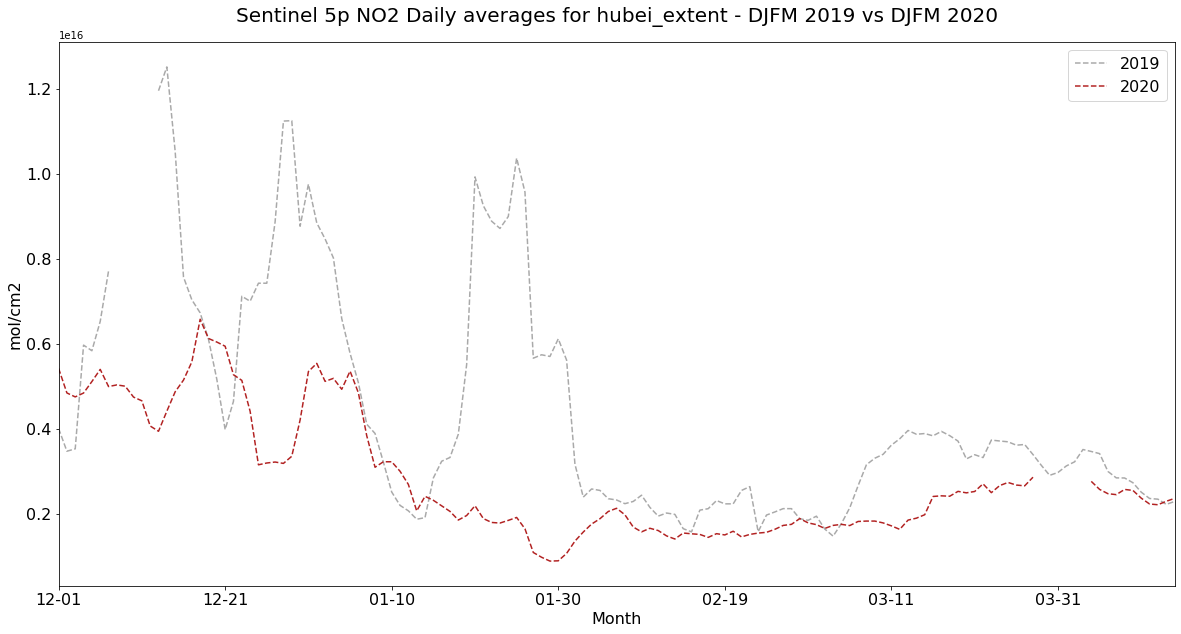

In [178]:
for region in no2_1920_dict.keys():
    djfm_mean = pd.DataFrame(no2_1920_dict[region]['7day_mean'])
    djfm_mean = djfm_mean.set_index('date')

    (djfm_mean*conversion_factor).plot.line(figsize=(20,10), linestyle='dashed',color=['darkgrey','firebrick'],label=['DJFM 2019','DJFM 2020'])

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Sentinel 5p NO2 Daily averages for " + region +  " - DJFM 2019 vs DJFM 2020", fontsize=20, pad=20)
    plt.ylabel('mol/cm2', fontsize=16)
    plt.xlabel('Month', fontsize=16)
    plt.legend(fontsize=16,loc=1)
    plt.show()

#### 7day moving average plot

In [ ]:

import matplotlib.patches as patches
ax = djfm_7day_ma.plot.line(figsize=(20,10), linestyle='dashed',color=['darkgrey','firebrick'],label=['DJFM 2019','DJFM 2020'],zorder=10)
rect = patches.Rectangle((djfm_7day_ma.index.get_loc('02-26'),0),34,120,linewidth=1, fill=True,facecolor='slateblue', alpha=0.1,)

ax.add_patch(rect)
ax.axvline(djfm_7day_ma.index.get_loc('02-26'), color='slateblue', linestyle='--', lw=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Sentinel 5p NO2 Daily averages for Milano region - DJFM 2019 vs DJFM 2020 (7 day moving average applied)", fontsize=20, pad=20)
plt.ylabel('mol/cm2', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.legend(fontsize=16,loc=1)
plt.show()


#### 15 day moving average plot

In [ ]:
ax = djfm_15day_ma.plot.line(figsize=(20,10), linestyle='dashed',color=['darkgrey','firebrick'],label=['DJFM 2019','DJFM 2020'])

ax.axvline(djfm_7day_ma.index.get_loc('02-24'), color='r', linestyle='--', lw=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Sentinel 5p NO2 Daily averages for Milano region - DJFM 2019 vs DJFM 2020 (15 day moving average applied)", fontsize=20, pad=20)
plt.ylabel('mol/cm2', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend(fontsize=16,loc=1)
plt.show()
